In [1]:
import pandas as pd
import numpy as np
from  matplotlib  import pyplot  as plt

In [2]:
df = pd.read_csv("data/shopping_behavior_updated.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Image URL
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,https://www.collinsdictionary.com/images/thumb...
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,https://www.collinsdictionary.com/images/thumb...
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,https://www.collinsdictionary.com/images/thumb...
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,https://www.collinsdictionary.com/images/thumb...
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,https://www.collinsdictionary.com/images/thumb...


In [4]:
df.shape

(3900, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3872 non-null   float64
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   float64
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3872.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.062758,66.854618,3.749949,25.351538
std,1125.977353,15.189986,257.109260,0.716223,14.447125
min,1.000000,18.000000,0.450000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,11234.000000,5.000000,50.000000


In [7]:
df.isnull().sum()

Customer ID                0
Age                       28
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating              0
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
Image URL                  0
dtype: int64

In [8]:
df['Age'].fillna(round(df['Age'].mean()),inplace=True)
df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22608\2797099962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(round(df['Age'].mean()),inplace=True)


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Image URL                 0
dtype: int64

In [9]:
df['Age'].astype(int)

0       55
1       19
2       50
3       21
4       45
        ..
3895    40
3896    52
3897    46
3898    44
3899    52
Name: Age, Length: 3900, dtype: int32

In [10]:
duplicatesValue = df.duplicated()
duplicatesValue

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

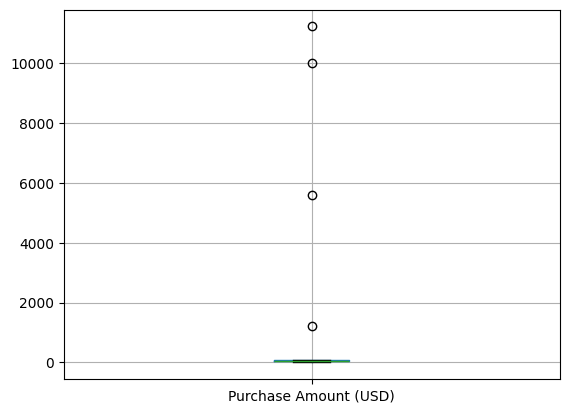

In [11]:
df.boxplot(column=['Purchase Amount (USD)'])
plt.show()

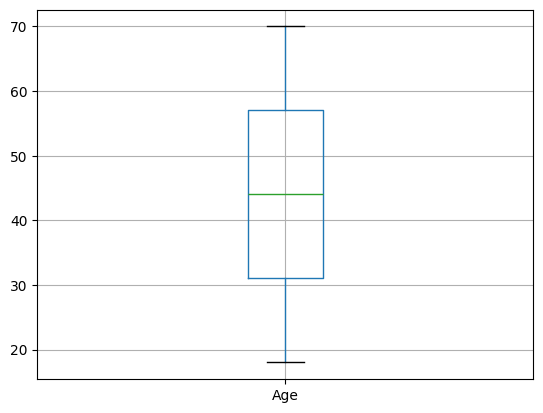

In [12]:
df.boxplot(column=['Age'])
plt.show()

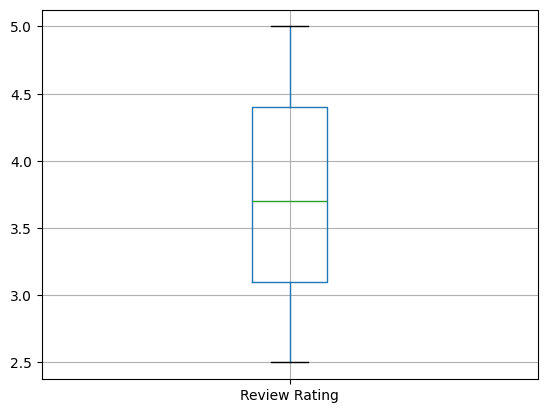

In [13]:
df.boxplot(column=['Review Rating'])
plt.show()

In [14]:
def removeOutlier(col):
    sr = df[col]
    sorted(sr)
    quant1, quant2 = sr.quantile([0.25,0.75])
    IQR = quant2-quant1
    lowerrange = quant1 - (1.5 * IQR)
    upperrange = quant2 + (1.5 * IQR)
    
    
    return lowerrange,upperrange

In [15]:
lowScore,highScore = removeOutlier('Purchase Amount (USD)')
df['Purchase Amount (USD)'] = np.where(df['Purchase Amount (USD)']>highScore,highScore,df['Purchase Amount (USD)'])
df['Purchase Amount (USD)'] = np.where(df['Purchase Amount (USD)']<lowScore,lowScore,df['Purchase Amount (USD)'])

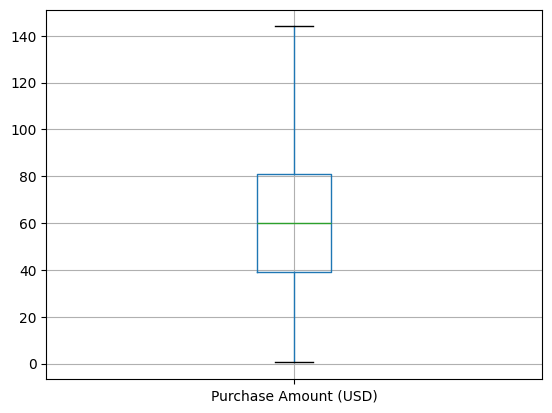

In [16]:

df.boxplot(column=['Purchase Amount (USD)'])
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   float64
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   float64
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [18]:
df = df.drop(columns=['Image URL','Size','Color','Discount Applied','Promo Code Used'])

In [19]:
df.to_csv('data/preprocessed_data.csv',index=False,header=True)